In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns


In [2]:

data = pd.read_csv("BatteryTableAllLogs.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'])


## Is there any variation in temperature range for a given sensor or Hub?


/var/folders/qm/w7f8y2y92dd90qvxq4hlyt6m0000gn/T/ipykernel_8572/3877820693.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/beccadai/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


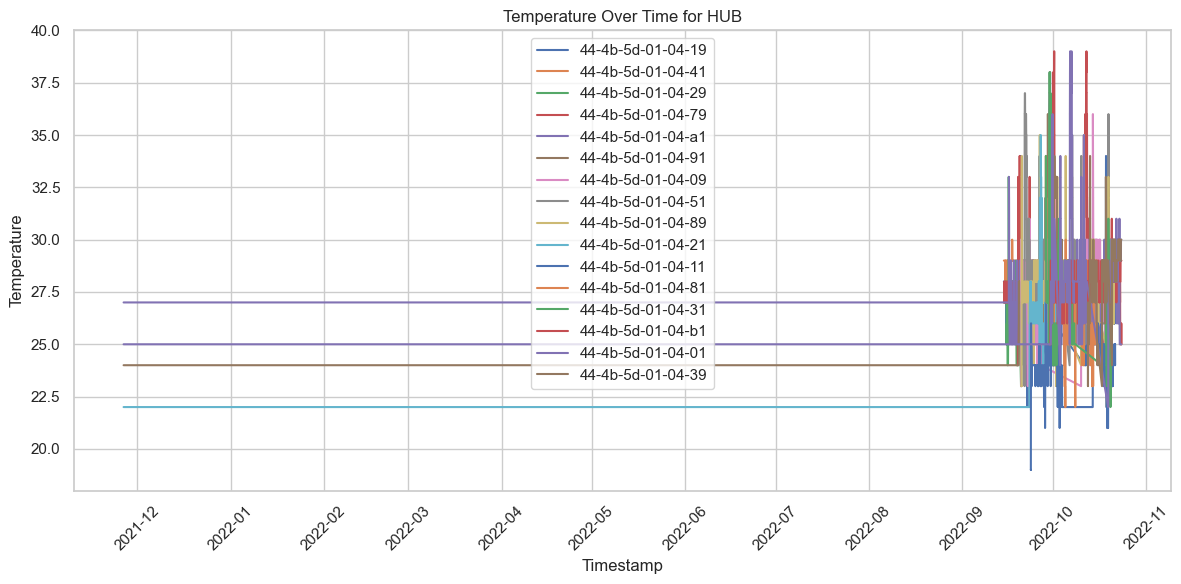

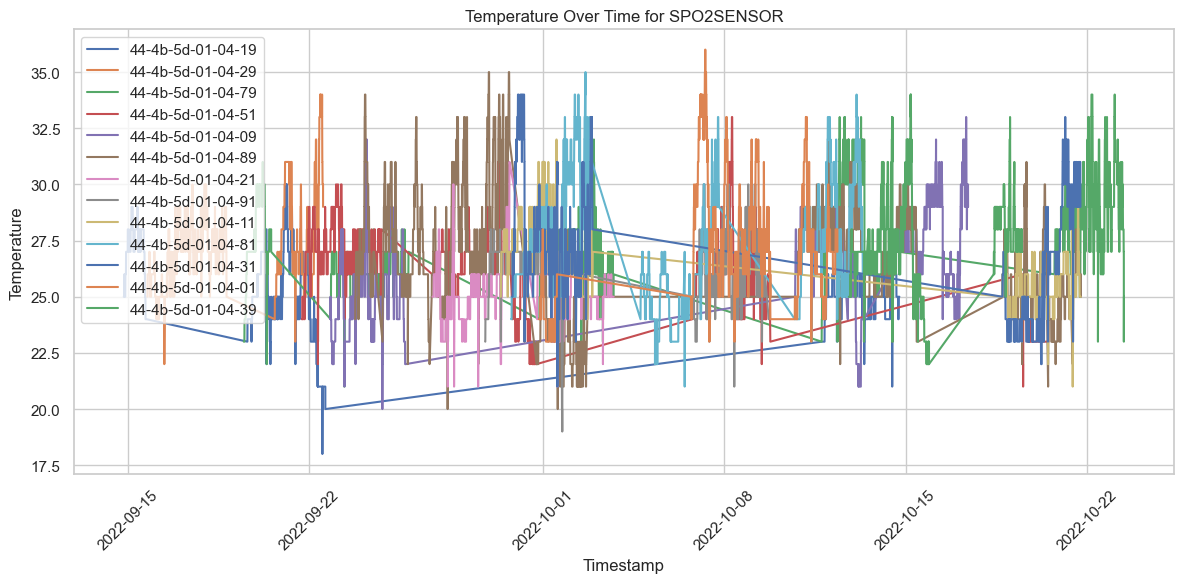

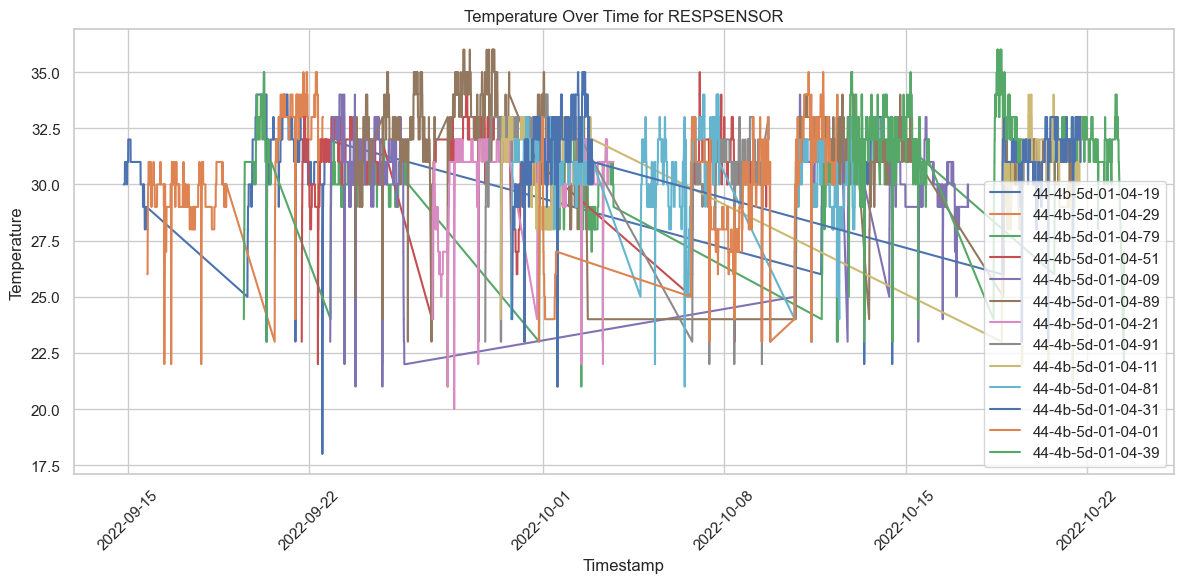

In [9]:
sns.set(style="whitegrid")

# Separate line plots for Sensors and Hubs
for device_type in data['device'].unique():
    plt.figure(figsize=(12, 6))
    device_type_data = data[data['device'] == device_type]
    for device_id in device_type_data['hostName'].unique():
        plt.plot('timestamp', 'temperature', data=device_type_data[device_type_data['hostName'] == device_id], label=device_id)
        
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Over Time for {device_type}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



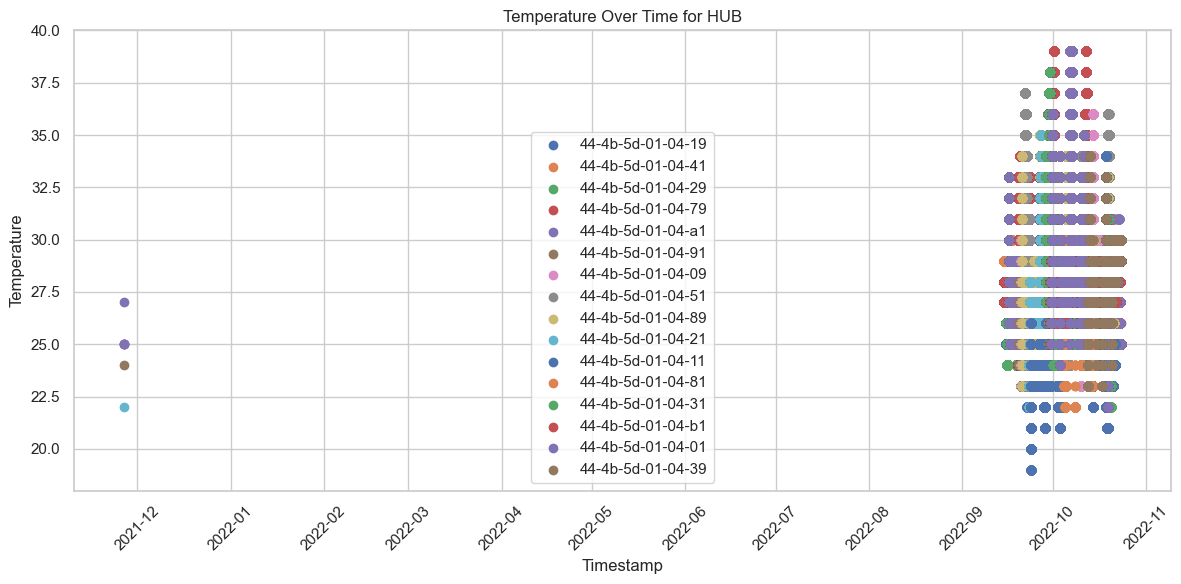

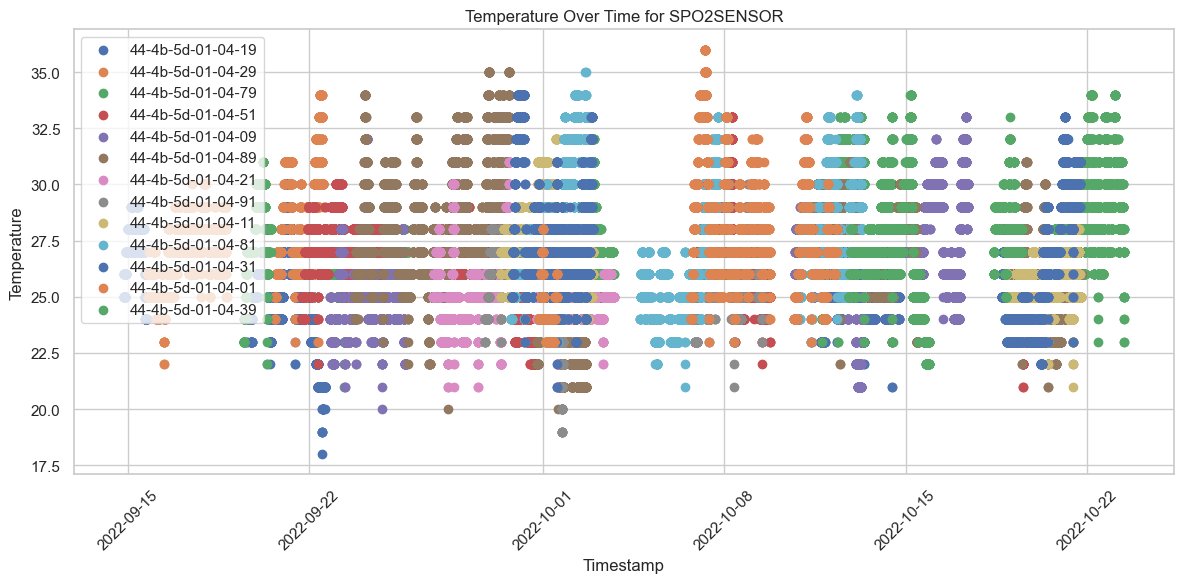

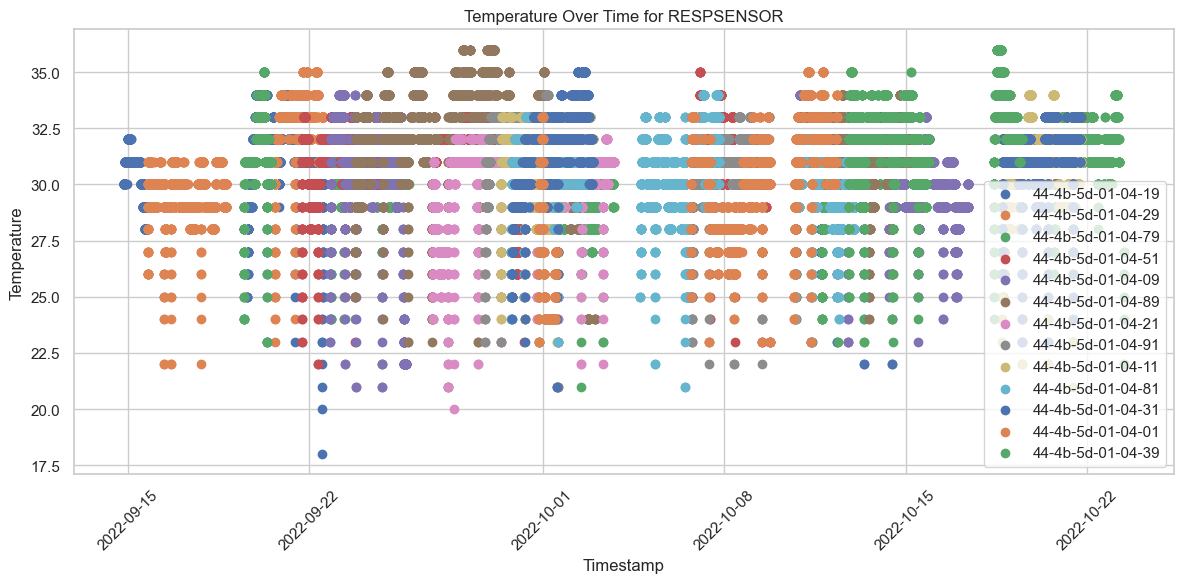

In [7]:


sns.set(style="whitegrid")

for device_type in data['device'].unique():
    plt.figure(figsize=(12, 6))
    device_type_data = data[data['device'] == device_type]
    for device_id in device_type_data['hostName'].unique():
        subset_data = device_type_data[device_type_data['hostName'] == device_id]
        plt.scatter(subset_data['timestamp'], subset_data['temperature'], label=device_id)
        
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Over Time for {device_type}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Temperature Statistic

In [12]:

def stat_sum(device_data): 
    stat_summary = device_data.groupby('hostName')['temperature'].agg(
        Min = np.min,
        Max = np.max,
        Mean=np.mean,
        Median=np.median,
        Range=lambda x: x.max() - x.min(),
        Variance=np.var,
        Standard_Deviation=np.std,
    )

    return stat_summary

for device in data['device'].unique():
    device_data = data[data['device'] == device]
    stat = stat_sum(device_data)
    
    print(f"Statistics for device: {device}")
    print(stat.mean())
    display(stat)


Statistics for device: HUB
Min                   23.000000
Max                   34.937500
Mean                  27.459903
Median                27.125000
Range                 11.937500
Variance               5.732809
Standard_Deviation     2.186304
dtype: float64


,Min,Max,Mean,Median,Range,Variance,Standard_Deviation
hostName,,,,,,,
44-4b-5d-01-04-01,22,39,29.130886,28.0,17,13.652529,3.694933
44-4b-5d-01-04-09,23,36,26.950633,27.0,13,4.331785,2.081294
44-4b-5d-01-04-11,19,34,23.947432,24.0,15,2.487440,1.577162
44-4b-5d-01-04-19,22,34,26.464208,26.0,12,2.699240,1.642936
44-4b-5d-01-04-21,22,35,28.434050,28.0,13,4.945983,2.223957
44-4b-5d-01-04-29,23,33,26.270655,26.0,10,2.946403,1.716509
44-4b-5d-01-04-31,22,38,27.177582,27.0,16,10.977566,3.313241
44-4b-5d-01-04-39,23,34,28.080250,28.0,11,2.789202,1.670090
44-4b-5d-01-04-41,28,31,28.980569,29.0,3,0.076934,0.277369


Statistics for device: SPO2SENSOR
Min                   20.769231
Max                   33.153846
Mean                  26.621184
Median                26.461538
Range                 12.384615
Variance               4.232791
Standard_Deviation     1.999980
dtype: float64


,Min,Max,Mean,Median,Range,Variance,Standard_Deviation
hostName,,,,,,,
44-4b-5d-01-04-01,23,36,27.403201,27.0,13,7.053363,2.655817
44-4b-5d-01-04-09,20,33,26.506803,27.0,13,4.502510,2.121912
44-4b-5d-01-04-11,21,32,26.514678,26.0,11,2.632962,1.622640
44-4b-5d-01-04-19,18,30,25.277953,25.0,12,2.927102,1.710877
44-4b-5d-01-04-21,21,31,25.106599,25.0,10,1.443535,1.201472
44-4b-5d-01-04-29,22,34,27.302931,27.0,12,3.457529,1.859443
44-4b-5d-01-04-31,21,34,26.856686,27.0,13,7.317398,2.705069
44-4b-5d-01-04-39,22,34,27.342391,27.0,12,3.985347,1.996333
44-4b-5d-01-04-51,21,33,26.062230,26.0,12,3.151057,1.775122


Statistics for device: RESPSENSOR
Min                   21.230769
Max                   34.615385
Mean                  31.102311
Median                31.230769
Range                 13.384615
Variance               2.563868
Standard_Deviation     1.561013
dtype: float64


,Min,Max,Mean,Median,Range,Variance,Standard_Deviation
hostName,,,,,,,
44-4b-5d-01-04-01,23,35,29.853643,31.0,12,6.989797,2.643822
44-4b-5d-01-04-09,21,34,30.683146,31.0,13,2.649784,1.627816
44-4b-5d-01-04-11,21,34,30.721318,31.0,13,2.172328,1.473882
44-4b-5d-01-04-19,18,35,31.429676,31.0,17,1.676324,1.294729
44-4b-5d-01-04-21,20,32,30.496031,31.0,12,2.084848,1.443900
44-4b-5d-01-04-29,22,35,30.806525,30.0,13,3.864244,1.965768
44-4b-5d-01-04-31,21,35,31.594055,32.0,14,1.994854,1.412393
44-4b-5d-01-04-39,23,36,32.222768,32.0,13,1.885812,1.373249
44-4b-5d-01-04-51,22,35,31.289738,31.0,13,1.881909,1.371827


In [4]:
temp_bar = data[~data['hostName'].isin(["44-4b-5d-01-04-41", "44-4b-5d-01-04-a1", "44-4b-5d-01-04-b1"])]


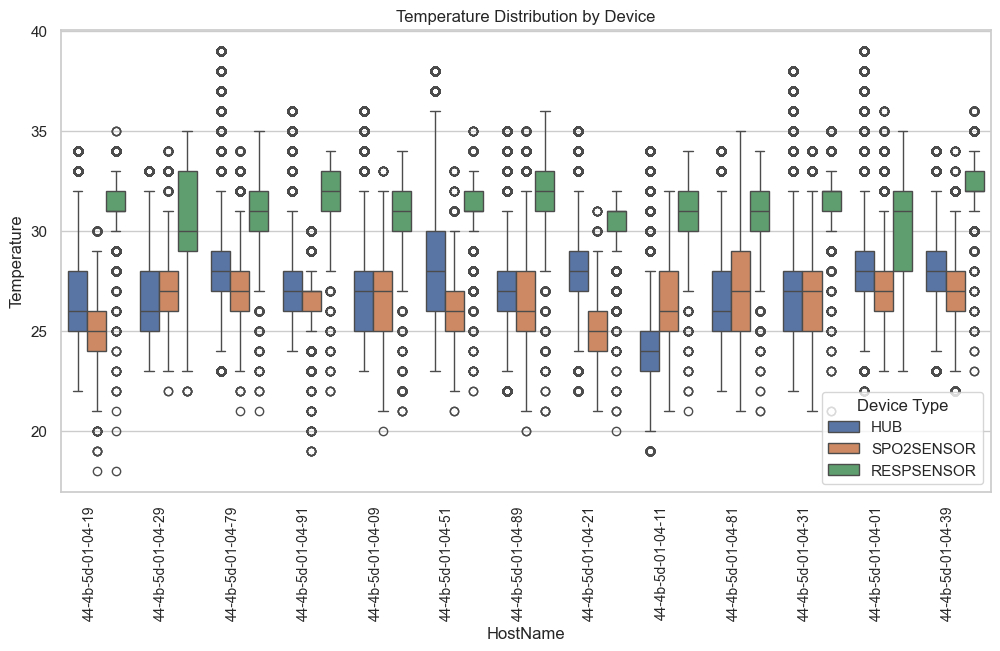

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hostName', y='temperature', hue='device', data=temp_bar)
plt.xlabel('HostName')
plt.xticks(rotation=90, ha='right') 
plt.tick_params(axis='x', which='major', labelsize=10)

plt.ylabel('Temperature')
plt.title('Temperature Distribution by Device')
plt.legend(title='Device Type')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


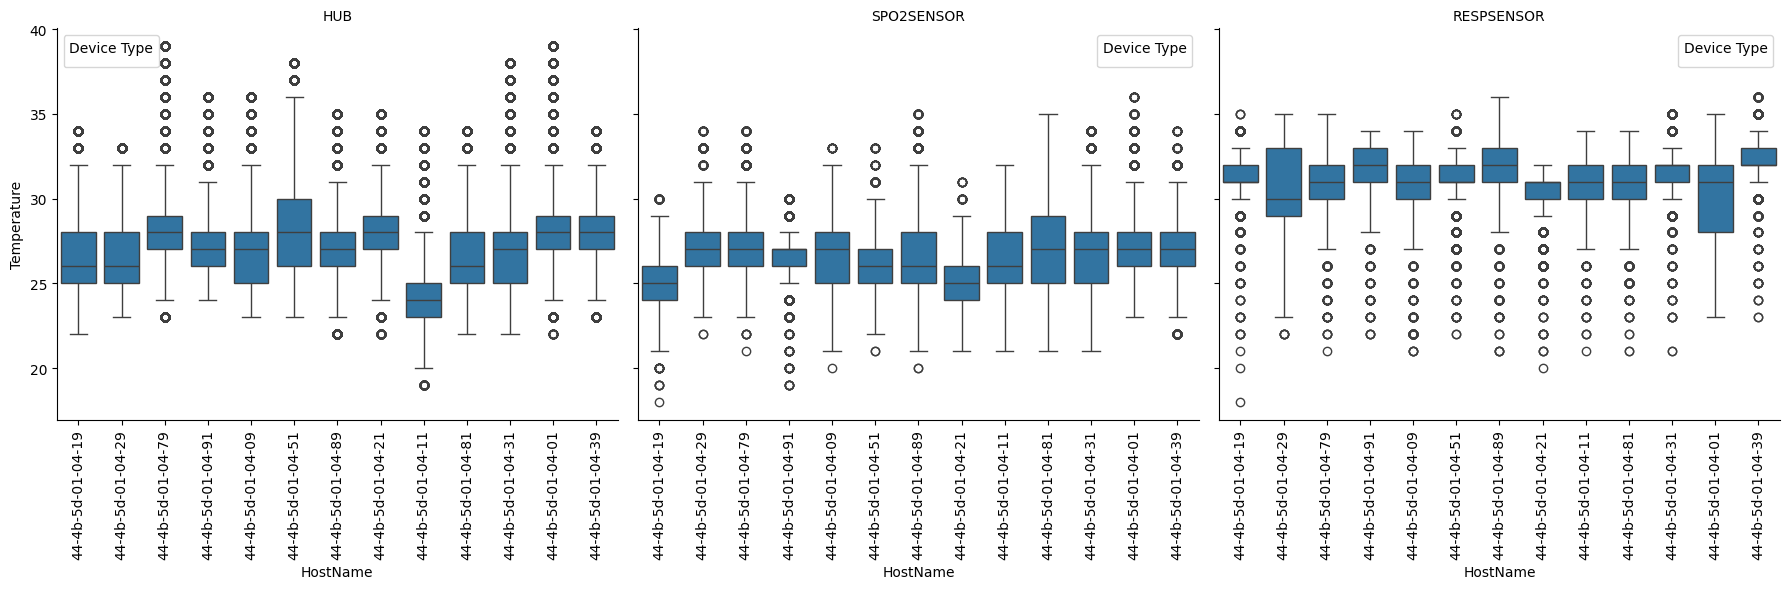

In [5]:

g = sns.FacetGrid(temp_bar, col="device", col_wrap=3, height=6)

g.map(sns.boxplot, 'hostName', 'temperature')

g.set_xticklabels(rotation=90)

g.set_titles('{col_name}')

for ax in g.axes.flat:
    ax.set_xlabel('HostName')
    ax.set_ylabel('Temperature')
    ax.legend(title='Device Type')

plt.tight_layout()
plt.show()


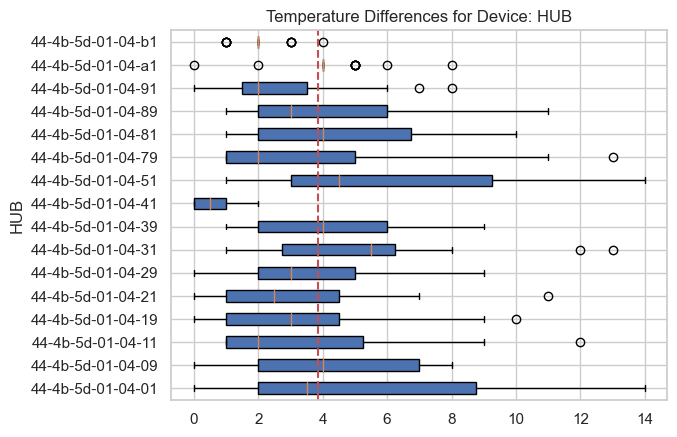

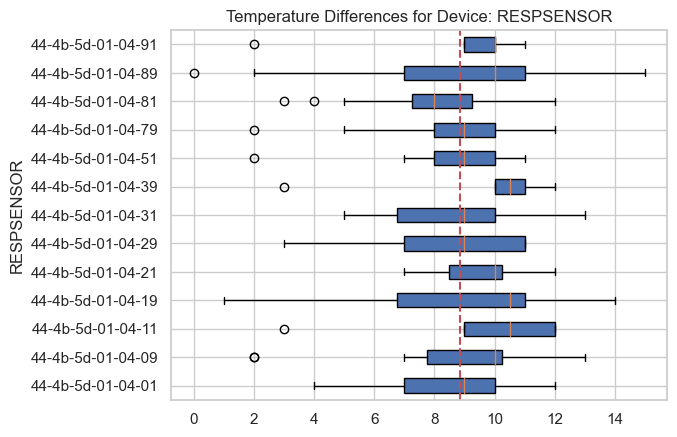

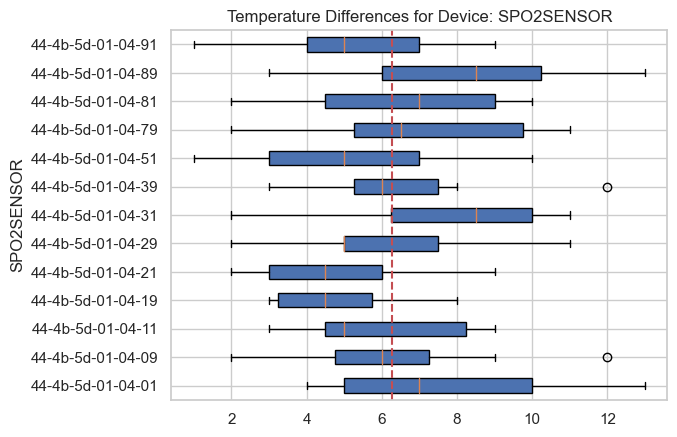

In [33]:
for device, group_data in data.groupby('device'):

    boxes = []  
    y_labels = []
    device_mean = []

    for name, group in group_data.groupby('hostName'):

        group['timestamp'] = pd.to_datetime(group['timestamp'])
        group = group.set_index('timestamp')
        
        grouped = group.resample('D') 

        daily_max = grouped['temperature'].max()
        daily_min = grouped['temperature'].min()

        differences = daily_max - daily_min
        differences = differences.dropna()  
        mean = differences.mean()

        #if mean >= 5:
        boxes.append(differences.values)
        device_mean.append(mean)
        y_labels.append(name)
        
    plt.boxplot(boxes, vert=False, patch_artist=True) 
    plt.ylabel(device)
    plt.yticks(range(1, len(y_labels) + 1), y_labels)
    plt.axvline(x=np.mean(device_mean), color='r', linestyle='--', label='mean')
    plt.title(f'Temperature Differences for Device: {device}')
    plt.show()


9847

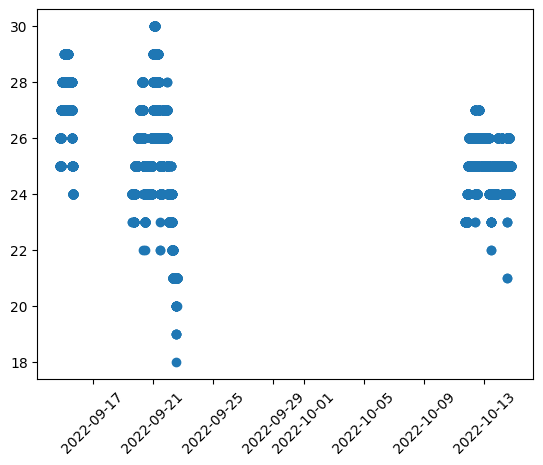

In [7]:
df = data[(data['hostName'] == "44-4b-5d-01-04-19") & (data['device'] == "SPO2SENSOR")]

#df = data[data['hostName'] == "44-4b-5d-01-04-79"]


#df.plot(x='timestamp', y='temperature')
plt.scatter(df['timestamp'], df['temperature'])
plt.xticks(rotation=45)

len(df)


651836

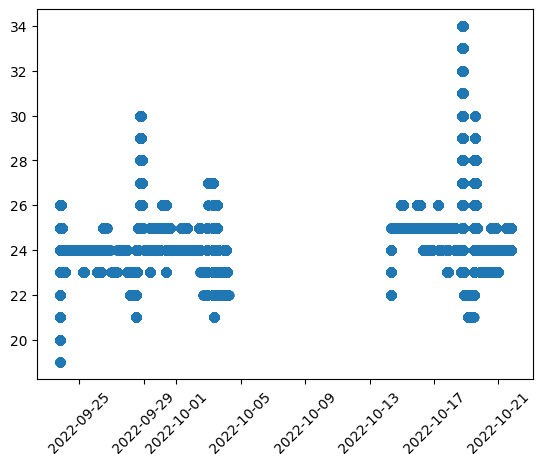

In [8]:
df = data[(data['hostName'] == "44-4b-5d-01-04-11") & (data['device'] == "HUB")]

#df = data[data['hostName'] == "44-4b-5d-01-04-79"]


#df.plot(x='timestamp', y='temperature')
plt.scatter(df['timestamp'], df['temperature'])
plt.xticks(rotation=45)

len(df)

In [13]:
df = data[(data['hostName'] == "44-4b-5d-01-04-41") & (data['device'] == "HUB")]
len(df)


1072912

In [14]:
df = data[(data['hostName'] == "44-4b-5d-01-04-a1") & (data['device'] == "HUB")]
len(df)


45854

In [16]:
df = data[(data['hostName'] == "44-4b-5d-01-04-b1") & (data['device'] == "HUB")]
len(df)

110902

In [5]:
from statsmodels.tsa.stattools import adfuller


adf_test_results = adfuller(df['temperature'])

adf_test_results_dict = {
    'Test Statistic': adf_test_results[0],
    'p-value': adf_test_results[1],
    'Number of Lags Used': adf_test_results[2],
    'Number of Observations Used': adf_test_results[3],
    'Critical Values': adf_test_results[4],
}

adf_test_results_dict


{'Test Statistic': -4.857215037690066,
 'p-value': 4.221656692468572e-05,
 'Number of Lags Used': 108,
 'Number of Observations Used': 651727,
 'Critical Values': {'1%': -3.430360033842017,
  '5%': -2.8615444348423447,
  '10%': -2.5667723605041837}}

In [3]:
import pandas as pd
import scipy.stats as stats

# Separate data by device
#df = data[(data['hostName'] == "44-4b-5d-01-04-41") & (data['device'] == "HUB")]

spo2_temps_19 = data[(data['hostName'] == "44-4b-5d-01-04-19") & (data['device'] == "HUB")]['temperature']
sp02_temps_29 = data[(data['hostName'] == "44-4b-5d-01-04-29") & (data['device'] == "HUB")]['temperature']

#hub_temps = data[(data['hostName'] == "44-4b-5d-01-04-19") & (data['device'] == "HUB")]['temperature']


t_stat, p_value = stats.ttest_ind(spo2_temps_19, sp02_temps_29, equal_var=False)


print(f'P-value: {p_value}')
#print(t_stat)
len(spo2_temps_19)



P-value: 0.0


859539

In [18]:
import scipy.stats as stats

spo2_temps_19 = data[(data['hostName'] == "44-4b-5d-01-04-19") & (data['device'] == "SPO2SENSOR")]['temperature']
sp02_temps_29 = data[(data['hostName'] == "44-4b-5d-01-04-29") & (data['device'] == "SPO2SENSOR")]['temperature']

# Assuming spo2_temps and resp_temps are your data arrays for each device
#t_stat, p_value = stats.ttest_ind(spo2_temps_19, sp02_temps_29, equal_var=True)  # For a standard two-sample t-test
#t_stat, p_value = stats.ttest_ind(spo2_temps_19, sp02_temps_29, equal_var=False)  # For Welch's t-test

#print(f"T-statistic: {t_stat}, P-value: {p_value}")
#u_stat, p_value = stats.mannwhitneyu(spo2_temps_19, sp02_temps_29)
#print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 14388798.5, P-value: 0.0


In [30]:
import numpy as np

def bootstrap_mean(data, n_bootstrap_samples=10000):
    bootstrap_means = np.empty(n_bootstrap_samples)
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

# Assuming you have your Spo2 and RESP temperature data in numpy arrays: spo2_temps and resp_temps
spo2_bootstrap_means = bootstrap_mean(spo2_temps_19)
sp02_temps_29_bootstrap_means = bootstrap_mean(sp02_temps_29)

# You can then compare these bootstrap means directly, or compute confidence intervals
# For example, to compute the 95% confidence interval for Spo2:
spo2_ci_low, spo2_ci_high = np.percentile(spo2_bootstrap_means, [2.5, 97.5])

# Perform similar calculations for RESP and compare the intervals or means as needed
print(spo2_ci_low, spo2_ci_high)

25.24413273078095 25.311770082258555


In [ ]:
data.describe()


In [7]:
len(data['hostName'].unique())
len(data)

8343277